### This Project is done from the perspective of a policy maker in the Department of Labour in pursuit of the following goals:
1. Which Major Categories has got the candidates with the highest chance of being employed in their field? That is we want to find the Major Category with the highest difference between the number of employed and the number of the unemployed,
2. To check the number of women that have graduated in the Stem fields and compare it with men,
3. To check the distribution of employment for the newly graduated students

In [52]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()
import altair as alt
from ggplot import *

###### The DataFrame that has Majors, Major Categories, Total number of students for each major, Total number of students employed for each major, Total number of students unemployed for each major

In [53]:
allages = pd.DataFrame.from_csv('college-majors/all-ages.csv', index_col=None)
allages.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


###### The code for grouping all the majors in their respective categories, and also add the other columns in their respective categories

In [54]:
Category1 = []
for i in allages.Major_category:
        if i not in Category1:
            Category1.append(i)
All_emp_total=[]
All_unem_total=[]
All_total_ =[]
for i in Category1:
        All_emp_total.append(allages[allages.Major_category==i]['Employed'].sum(axis=0))
        All_unem_total.append(allages[allages.Major_category==i]['Unemployed'].sum(axis=0))
        All_total_.append(allages[allages.Major_category==i]['Total'].sum(axis=0))
Alldict ={}
Alldict['All_Major_Category'] = Category1
Alldict['All_Employed'] = All_emp_total
Alldict['All_Unemployed'] = All_unem_total
Alldict['All_Total'] = All_total_

Allnew = pd.DataFrame(Alldict)
Allnew['All_diff'] = Allnew['All_Employed'] + Allnew['All_Unemployed']
Allnew = Allnew.sort_values(by=['All_diff'], ascending = False)
Allnew = Allnew.reset_index(drop= True)

Allnew

,All_Employed,All_Major_Category,All_Total,All_Unemployed,All_diff
0,7529851,Business,9858741,434397,7964248
1,2833199,Education,4700118,125336,2958535
2,2621966,Engineering,3576013,146389,2768355
3,2499175,Humanities & Liberal Arts,3738335,179136,2678311
4,2192692,Health,2950859,75013,2267705
5,1871803,Social Science,2654125,132150,2003953
6,1423041,Communications & Journalism,1803822,101199,1524240
7,1411983,Psychology & Social Work,1987278,104206,1516189
8,1410607,Computers & Mathematics,1781378,79974,1490581
9,1308695,Arts,1805865,104125,1412820


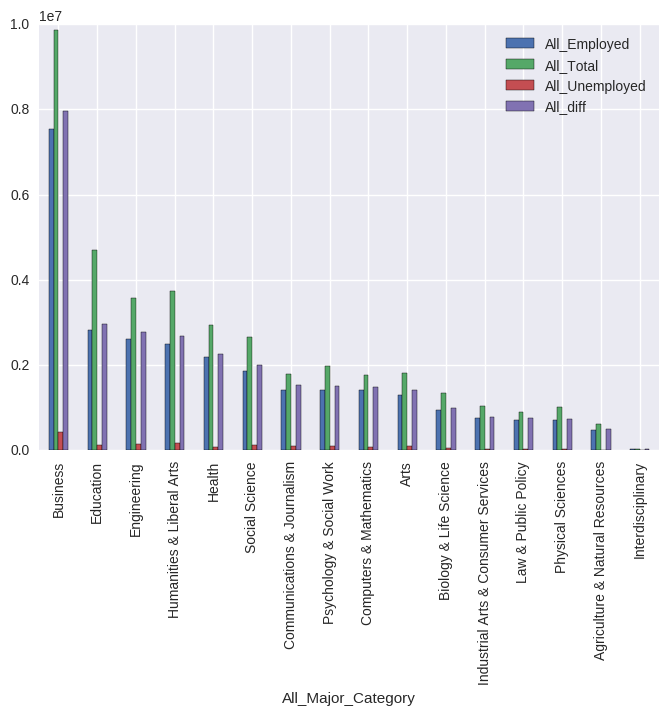

In [55]:
Allnew.plot('All_Major_Category',kind='bar')

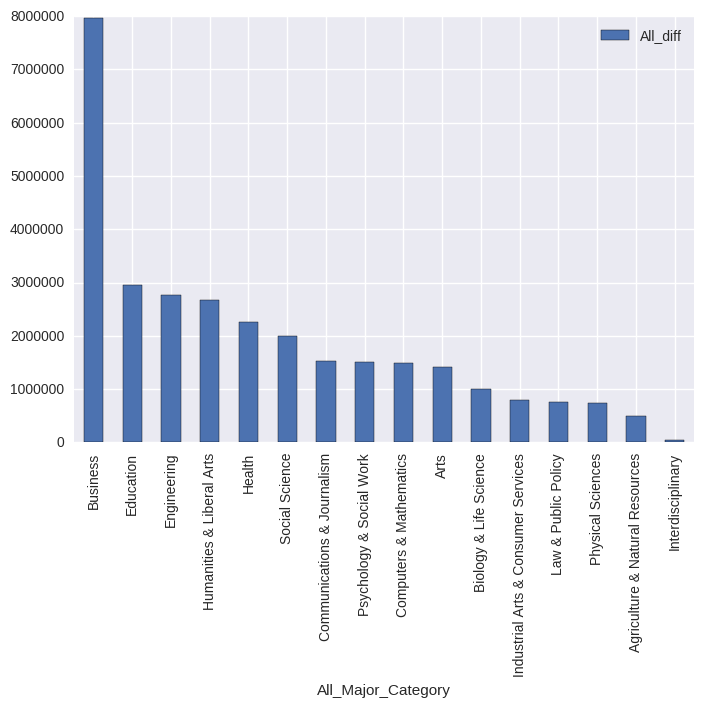

In [56]:
Allnew.plot('All_Major_Category','All_diff', kind='bar')

In [57]:
womenstem = pd.DataFrame.from_csv('college-majors/women-stem.csv', index_col=None)
womenstem.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [58]:
Category2 = []
for i in womenstem.Major_category:
        if i not in Category2:
            Category2.append(i)
stem_total=[]
stem_women=[]
stem_men=[]
for i in Category2:
        stem_total.append(womenstem[womenstem.Major_category==i]['Total'].sum(axis=0))
        stem_women.append(womenstem[womenstem.Major_category==i]['Women'].sum(axis=0))
        stem_men.append(womenstem[womenstem.Major_category==i]['Men'].sum(axis=0))
stem_dict ={}
stem_dict['Stem_Major_Category'] = Category2
stem_dict['Stem_Total'] = stem_total
stem_dict['Stem_Women'] = stem_women
stem_dict['Stem_Men'] = stem_men

Stemnew = pd.DataFrame(stem_dict)
Stemnew = Stemnew.sort_values(by=['Stem_Women'], ascending = False)
Stemnew = Stemnew.reset_index(drop= True)
Stemnew['Net_Stem_Women'] = Stemnew['Stem_Women'] - Stemnew['Stem_Men']
Stemnew

,Stem_Major_Category,Stem_Men,Stem_Total,Stem_Women,Net_Stem_Women
0,Health,75517,463230,387713,312196
1,Biology & Life Science,184919,453862,268943,84024
2,Engineering,408307,537583,129276,-279031
3,Computers & Mathematics,208725,299008,90283,-118442
4,Physical Sciences,95390,185479,90089,-5301


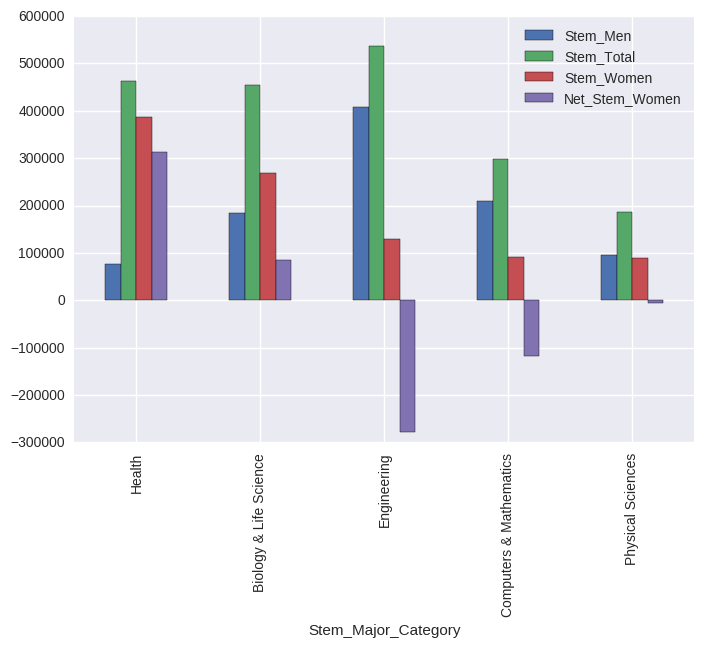

In [59]:
Stemnew.plot('Stem_Major_Category', kind='bar')

In [60]:
gradstudents = pd.DataFrame.from_csv('college-majors/grad-students.csv', index_col=None)
gradstudents.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [61]:
Category3 = []
for i in gradstudents.Major_category:
        if i not in Category3:
            Category3.append(i)
grad_total=[]
grad_employed=[]
grad_unemployed=[]
for i in Category3:
        grad_total.append(gradstudents[gradstudents.Major_category==i]['Grad_total'].sum(axis=0))
        grad_employed.append(gradstudents[gradstudents.Major_category==i]['Grad_employed'].sum(axis=0))
        grad_unemployed.append(gradstudents[gradstudents.Major_category==i]['Grad_unemployed'].sum(axis=0))
grad_dict ={}
grad_dict['Grad_Major_Category'] = Category3
grad_dict['Grad_Total'] = grad_total
grad_dict['Grad_Employed'] = grad_employed
grad_dict['Grad_Unemployed'] = grad_unemployed

Gradnew = pd.DataFrame(grad_dict)
Gradnew = Gradnew.sort_values(by=['Grad_Employed'], ascending = False)
Gradnew = Gradnew.reset_index(drop= True)
Gradnew['Net_Employment'] = Gradnew['Grad_Employed'] - Gradnew['Grad_Unemployed']
Gradnew

,Grad_Employed,Grad_Major_Category,Grad_Total,Grad_Unemployed,Net_Employment
0,2437166,Education,3945300,66938,2370228
1,2124495,Business,2718897,101994,2022501
2,1986572,Humanities & Liberal Arts,2825975,85033,1901539
3,1634563,Engineering,2132524,65073,1569490
4,1381570,Social Science,1839710,60528,1321042
5,1365336,Biology & Life Science,1656556,32022,1333314
6,1255928,Psychology & Social Work,1630545,49428,1206500
7,1148800,Health,1468337,25962,1122838
8,770365,Physical Sciences,1052485,24030,746335
9,716607,Computers & Mathematics,919817,29062,687545


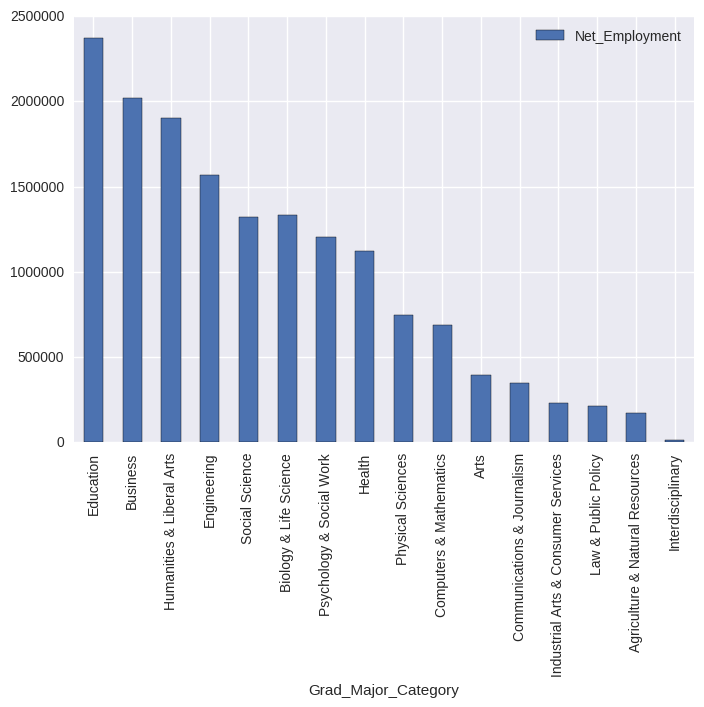

In [62]:
Gradnew.plot('Grad_Major_Category','Net_Employment', kind='bar')

In [63]:
recentgrads = pd.DataFrame.from_csv('college-majors/recent-grads.csv', index_col=None)
recentgrads.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [64]:
Category4 = []
for i in recentgrads.Major_category:
        if i not in Category4:
            Category4.append(i)
recentgrads_total = []
recentgrads_employed = []
recentgrads_unemployed = []
recentgrads_men = []
recentgrads_women = []
for i in Category4:
        recentgrads_total.append(recentgrads[recentgrads.Major_category==i]['Total'].sum(axis=0))
        recentgrads_employed.append(recentgrads[recentgrads.Major_category==i]['Employed'].sum(axis=0))
        recentgrads_unemployed.append(recentgrads[recentgrads.Major_category==i]['Unemployed'].sum(axis=0))
        recentgrads_women.append(recentgrads[recentgrads.Major_category==i]['Women'].sum(axis=0))
        recentgrads_men.append(recentgrads[recentgrads.Major_category==i]['Men'].sum(axis=0))
recentgrads_dict ={}
recentgrads_dict['Recentgrads_Major_Category'] = Category4
recentgrads_dict['Recentgrads_Total'] = recentgrads_total
recentgrads_dict['Recentgrads_Employed'] = recentgrads_employed
recentgrads_dict['Recentgrads_Unemployed'] = recentgrads_unemployed
recentgrads_dict['Recentgrads_Men'] = recentgrads_men
recentgrads_dict['Recentgrads_Women'] = recentgrads_women

Recentgradsnew = pd.DataFrame(recentgrads_dict)
Recentgradsnew = Recentgradsnew.sort_values(by=['Recentgrads_Women'], ascending = False)
Recentgradsnew = Recentgradsnew.reset_index(drop= True)
Recentgradsnew['Recentgrads_Net_Employment'] = Recentgradsnew['Recentgrads_Employed'] - Recentgradsnew['Recentgrads_Unemployed']
Recentgradsnew['Recentgrads_Net_Women'] = Recentgradsnew['Recentgrads_Women'] - Recentgradsnew['Recentgrads_Men']  

Recentgradsnew

,Recentgrads_Employed,Recentgrads_Major_Category,Recentgrads_Men,Recentgrads_Total,Recentgrads_Unemployed,Recentgrads_Women,Recentgrads_Net_Employment,Recentgrads_Net_Women
0,479839,Education,257712,559129,24969,612958,454870,355246
1,302797,Biology & Life Science,427803,453862,22854,578132,279943,150329
2,380344,Psychology & Social Work,235847,481007,33292,504662,347052,268815
3,401493,Social Science,503357,529966,42975,463616,358518,-39741
4,544118,Humanities & Liberal Arts,159945,713468,51101,349636,493017,189691
5,372147,Health,94630,463230,22213,312026,349934,217396
6,66943,Agriculture & Natural Resources,197875,79981,3824,249812,63119,51937
7,139231,Physical Sciences,184879,185479,7880,244996,131351,60117
8,288114,Arts,86781,357130,28228,140469,259886,53688
9,420372,Engineering,400644,537583,29817,118051,390555,-282593


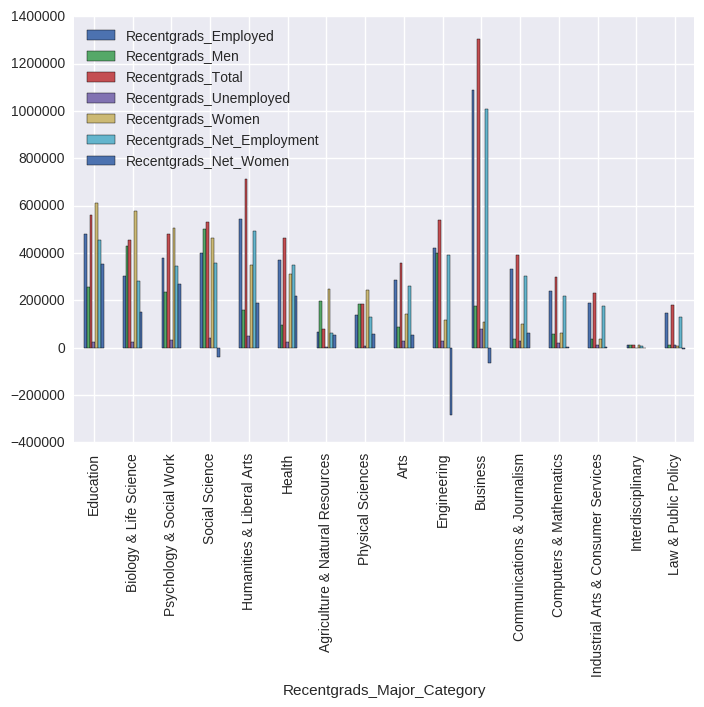

In [65]:
Recentgradsnew.plot('Recentgrads_Major_Category',kind='bar')

###### The plot below shows the magitude of the difference between men employed and the women recent grads and the male recent grads

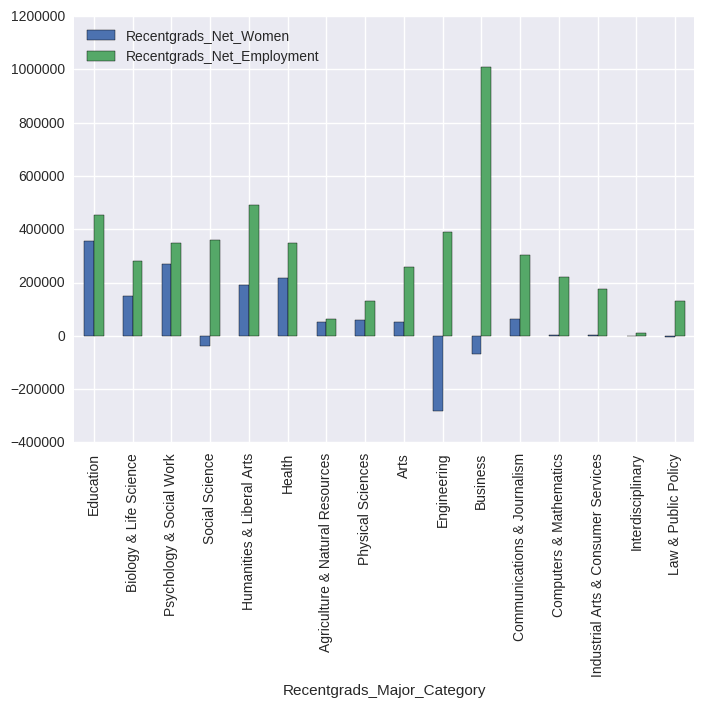

In [66]:
Recentgradsnew.plot('Recentgrads_Major_Category',['Recentgrads_Net_Women','Recentgrads_Net_Employment'],kind='bar')